<a href="https://colab.research.google.com/github/zeehayat/data-science/blob/main/KNN_with_explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris  # Loads the Iris dataset
from sklearn.neighbors import KNeighborsClassifier  # Implements KNN algorithm
from sklearn.model_selection import train_test_split  # Splits data for training and testing


In [2]:
iris = load_iris()
X = iris.data  # Features (petal length, petal width, sepal length, sepal width)
y = iris.target  # Labels (Iris setosa, Iris versicolor, Iris virginica)


1.   load_iris() loads the dataset into a variable called iris.
2.   X stores the features, the numerical measurements of the flowers.
1.   y stores the labels, the corresponding iris species for each flower.








In [3]:
# 3. Split Data into Training and Test Sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




# Explanation:

* We're dividing the data using train_test_split:
** 75% for training the model (X_train, y_train)
** 25% for testing its performance (X_test, y_test)
* test_size specifies the proportion for testing.
* random_state ensures consistent results across different runs.

In [4]:
# Create a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Choose k=5 neighbors for now


# Explanation:

### KNeighborsClassifier initializes a KNN model.
### n_neighbors=5 sets the number of neighbors to consider for prediction.

In [5]:
# 5. Train the KNN Model:
knn.fit(X_train, y_train)  # Trains the model using the training data



KNeighborsClassifier()

#### fit uses the training data to learn the relationships between features and labels, essentially teaching the KNN model how to classify new flowers.

In [7]:
# Make Prediction on the Test Data
y_pred = knn.predict(X_test)  # Uses the trained model to predict labels for unseen test data




*   predict applies the KNN model to the unseen test data, estimating the flower species class for each example.
*  y_pred stores the predicted labels for the test data.

In [8]:
# Evaluate Model Performance
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")  # Calculate and print the model's accuracy


Accuracy: 1.0000


# Explanation:

* We import accuracy_score from sklearn.metrics to measure the model's performance.
* It compares the predicted labels (y_pred) with the actual labels (y_test) of the test data and calculates the percentage of correct predictions.
* This gives us an indication of how well the KNN model generalizes to unseen data.

In [23]:
# import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

# Load the Iris dataset (can be downloaded or adjust file path as needed)
#iris = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

#iris.head()
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris.data  # Features
iris_target = iris.target  # Labels

# Create a DataFrame if needed
import pandas as pd

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df["species"] = iris_target
iris_df.to_csv("iris.csv", index=False)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Scatter Plot with Actual and Predicted Labels

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = pd.read_csv("iris.csv")  # Adjust file path if needed

# Split data into features and target labels
X = iris.drop("species", axis=1)  # Features
y = iris["species"]  # Target labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a KNN model
model = KNeighborsClassifier(n_neighbors=5)  # Choose your desired k value

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
predicted_labels = model.predict(X_test)

predicted_labels.shape
# Add predicted labels to the DataFrame
#iris["predicted_species"] = predicted_labels
len(iris)
#len(predicted_labels)

150

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
# Load the Iris dataset
iris = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")  # Adjust file path if needed
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [42]:
# Split data into features and target labels
X = iris.drop("species", axis=1)  # Features
y = iris["species"]  # Target labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a KNN model with a chosen k value
model = KNeighborsClassifier(n_neighbors=5)  # Experiment with different k values

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
predicted_labels = model.predict(X_test)

# Add predicted labels to the DataFrame
# iris["predicted_species"] = predicted_labels
predicted_labels_extended = np.concatenate([predicted_labels, np.empty(112)])
iris["predicted_species"] = predicted_labels_extended

# Create a scatter plot comparing actual and predicted labels
sns.scatterplot(
    x="petal_length_cm",
    y="petal_width_cm",
    hue="species",
    style="predicted_species",
    data=iris,
    palette="hls",
)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris Classification with KNN (Actual vs. Predicted)")
plt.legend(title="Species", loc="upper left")
plt.show()

# Visualize decision boundaries
# Create a mesh grid to cover the feature space
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict labels for all points in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predictions back into a grid
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Spectral)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("KNN Decision Boundaries")
plt.show()

(150, 5)

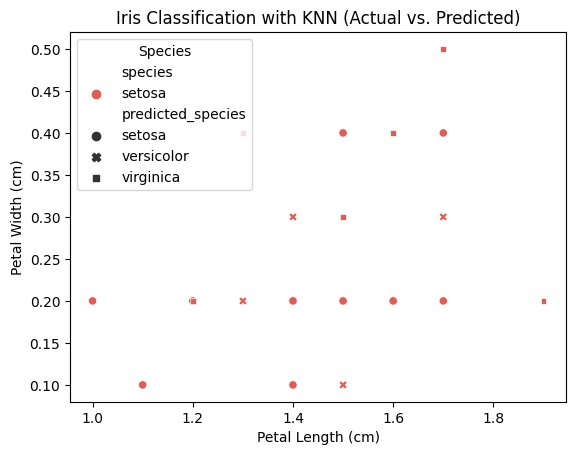

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris  # Import the Iris dataset from sklearn

# Load the Iris dataset directly from sklearn
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["species"] = pd.Series(iris.target_names[iris.target])  # Correct mapping

# Split data into features and target labels
X = iris_df.drop("species", axis=1)  # Features
y = iris_df["species"]  # Target labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a KNN model with a chosen k value
model = KNeighborsClassifier(n_neighbors=5)  # Experiment with different k values

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
predicted_labels = model.predict(X_test)

# Add predicted labels to the DataFrame
# iris_df["predicted_species"] = predicted_labels
predicted_df = pd.DataFrame({"predicted_species": predicted_labels})
combined_df = pd.concat([iris_df.iloc[:38], predicted_df], axis=1)  # Select first 38 rows

# ... (previous code)

# Ensure predicted_species is categorical
combined_df["predicted_species"] = combined_df["predicted_species"].astype("category")

# Create the scatter plot (now using the correct data type)
sns.scatterplot(
    x="petal length (cm)",
    y="petal width (cm)",
    hue="species",
    style="predicted_species",
    data=combined_df,
    palette="hls",
)
# ... (rest of the code remains the same)

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris Classification with KNN (Actual vs. Predicted)")
plt.legend(title="Species", loc="upper left")
plt.show()

# Visualize decision boundaries (rest of the code remains the same)
# ...


In [63]:
# ... (previous code)

# Create a mesh grid to plot the decision boundaries
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()

# Create the mesh grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on the mesh grid to get class labels for each point
# Create a mesh grid with all 4 features
xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.02),
                       np.arange(y_min, y_max, 0.02))
xx3 = np.ones_like(xx1) * X_train[:, 2].mean()  # Assuming mean for feature 3
xx4 = np.ones_like(xx1) * X_train[:, 3].mean()  # Assuming mean for feature 4
xx = np.c_[xx1.ravel(), xx2.ravel(), xx3.ravel(), xx4.ravel()]

# Predict on the mesh grid
# ... (previous code)

# Predict on the mesh grid
Z = model.predict(xx)
Z = Z.reshape(xx1.shape)  # Reshape to match xx1

# Create a contour plot with filled contours for better visualization
# Assuming Z contains strings that need conversion:
Z_numeric = pd.to_numeric(Z, errors='coerce')  # Convert to numeric, replace errors with NaN
Z_numeric = Z_numeric.dropna()  # Remove any remaining NaN values

# Proceed with contour plot using Z_numeric
plt.contourf(xx1, xx2, Z_numeric, alpha=0.3, cmap=plt.cm.coolwarm)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# ... (rest of the code)


# Create a contour plot with filled contours for better visualization
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Add the scatter plot of the actual data points on top of the contour plot
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)

# Label the axes and title
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Decision Boundaries for KNN (k=5)")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


TypeError: ignored